In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
def read_csv(file_path):
    df = pd.read_csv(file_path, delimiter=',')
    return df

In [3]:
data = read_csv("particle_data_run0.csv")
data.head()

,ParticleType,Energy
0,pi-,205.700
1,pi-,205.700
2,pi-,205.700
3,2mu-,179.228
4,2mu-,179.228


In [4]:
data.shape

(149415, 2)

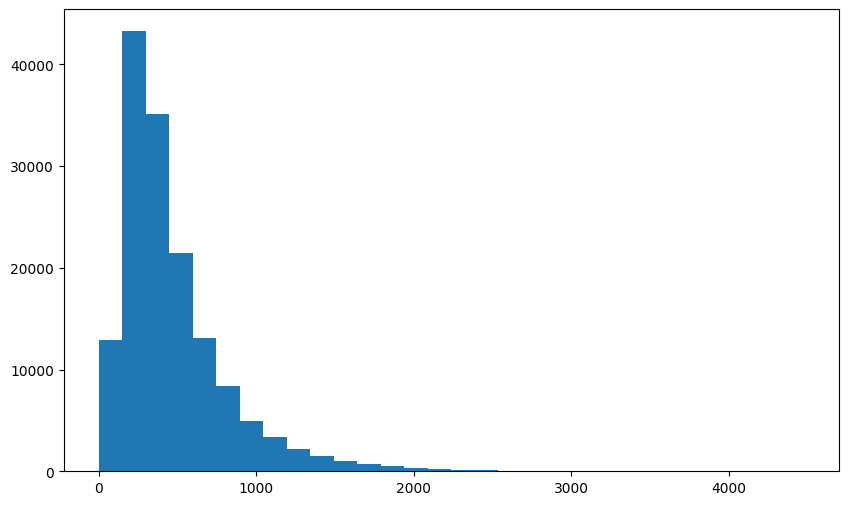

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(data["Energy"], bins=30)
plt.savefig('energy_distribution.png')
plt.show()

In [6]:
particle_col = data.columns[0]
energy_col = data.columns[1]

# Separate particles based on whether they have "2" at position 0
det1_particle = []
det1_energy = []
det2_particle = []
det2_energy = []

for i, row in data.iterrows():
    particle_name = str(row[particle_col])
    energy = float(row[energy_col])
    
    # Check if particle was detected in detector 2
    if particle_name.startswith('2') or '_2' in particle_name or 'Det_2' in particle_name:
        det2_particle.append(particle_name)
        det2_energy.append(energy)
    else:
        det1_particle.append(particle_name)
        det1_energy.append(energy)


In [7]:
mu_p_1 = []  # mu+ particles in detector 1
mu_p_1_e = []  # mu+ energies in detector 1
mu_m_1 = []  # mu- particles in detector 1
mu_m_1_e = []  # mu- energies in detector 1
pi_p_1 = []  # pi+ particles in detector 1
pi_p_1_e = []  # pi+ energies in detector 1
pi_m_1 = []  # pi- particles in detector 1
pi_m_1_e = []  # pi- energies in detector 1
mu_p_2 = []  # mu+ particles in detector 2
mu_p_2_e = []  # mu+ energies in detector 2
mu_m_2 = []  # mu- particles in detector 2
mu_m_2_e = []  # mu- energies in detector 2
pi_p_2 = []  # pi+ particles in detector 2
pi_p_2_e = []  # pi+ energies in detector 2
pi_m_2 = []  # pi- particles in detector 2
pi_m_2_e = []  # pi- energies in detector 2

In [8]:

for i in range(0, len(det1_particle)):
    if det1_particle[i] == "mu+":
        mu_p_1.append(det1_particle[i])
        mu_p_1_e.append(det1_energy[i])
    elif det1_particle[i] == "mu-":
        mu_m_1.append(det1_particle[i])
        mu_m_1_e.append(det1_energy[i])
    elif det1_particle[i] == "pi+":
        pi_p_1.append(det1_particle[i])
        pi_p_1_e.append(det1_energy[i])
    elif det1_particle[i] == "pi-":
        pi_m_1.append(det1_particle[i])
        pi_m_1_e.append(det1_energy[i])

In [9]:
for i in range(0, len(det2_particle)):
    # Strip any detector suffix to get the base particle name
    particle_name = det2_particle[i]
    if particle_name == "2mu+":
        mu_p_2.append(det2_particle[i])
        mu_p_2_e.append(det2_energy[i])
    elif particle_name == "2mu-":
        mu_m_2.append(det2_particle[i])
        mu_m_2_e.append(det2_energy[i])
    elif particle_name == "2pi+":
        pi_p_2.append(det2_particle[i])
        pi_p_2_e.append(det2_energy[i])
    elif particle_name == "2pi-":
        pi_m_2.append(det2_particle[i])
        pi_m_2_e.append(det2_energy[i])

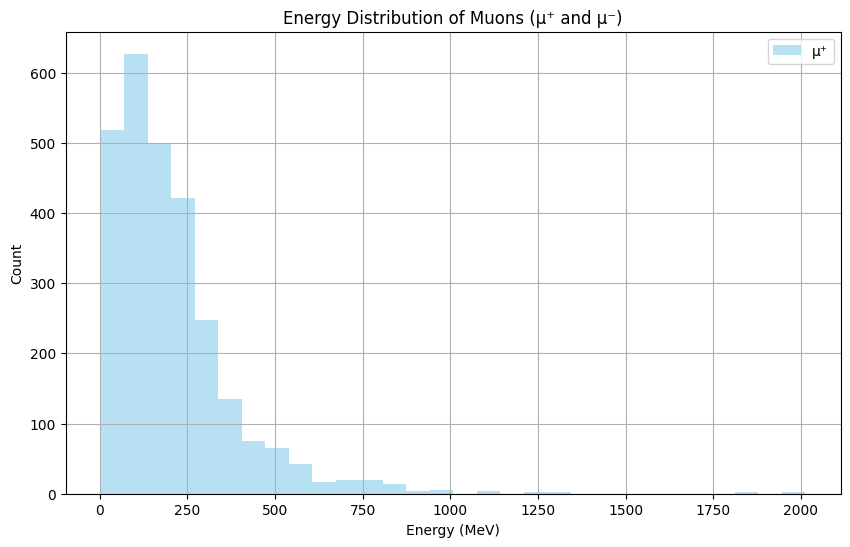

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(mu_p_1_e, bins=30, alpha=0.6, label='μ⁺', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (μ⁺ and μ⁻)')
plt.legend()
plt.grid(True)
plt.show()

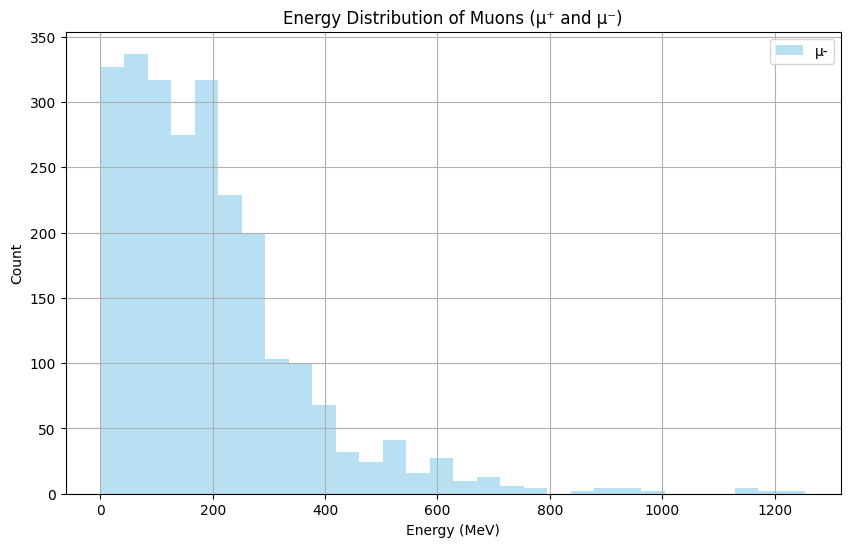

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(mu_m_1_e, bins=30, alpha=0.6, label='μ-', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (μ⁺ and μ⁻)')
plt.legend()
plt.grid(True)
plt.show()

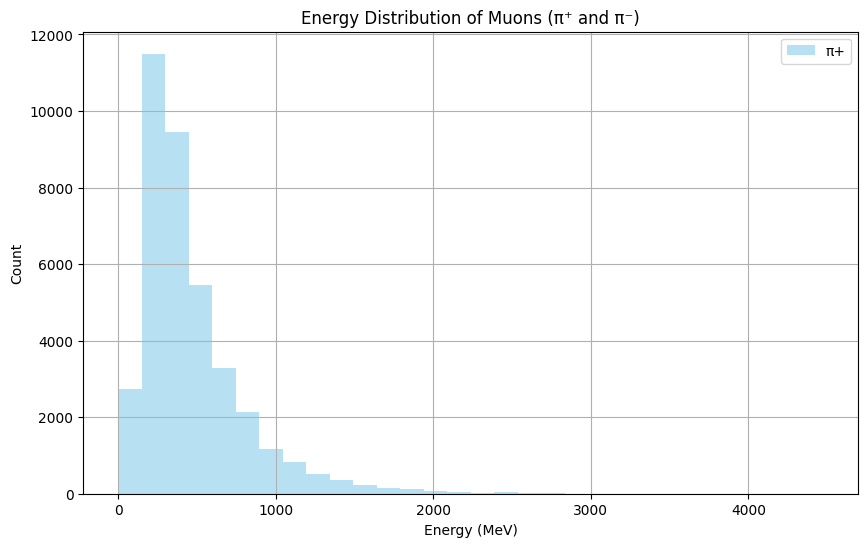

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(pi_p_1_e, bins=30, alpha=0.6, label='π+', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (π⁺ and π⁻)')
plt.legend()
plt.grid(True)
plt.show()

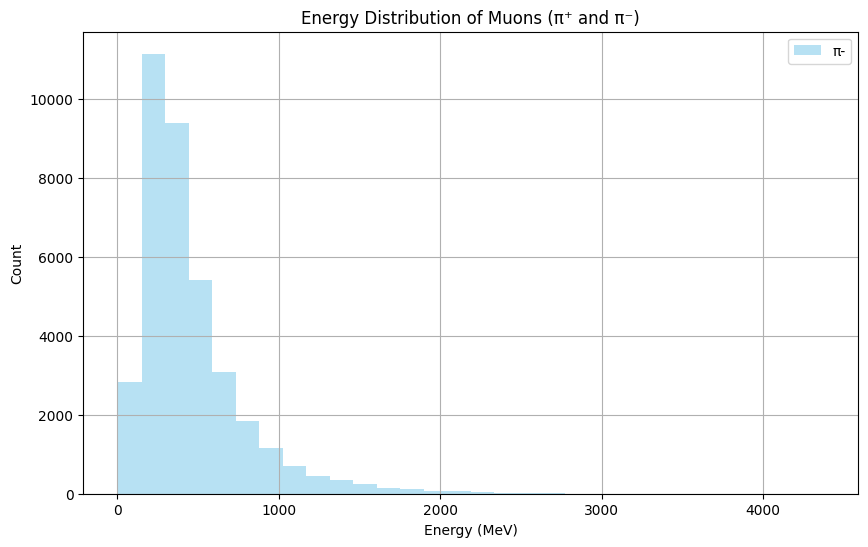

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(pi_m_1_e, bins=30, alpha=0.6, label='π-', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (π⁺ and π⁻)')
plt.legend()
plt.grid(True)
plt.show()

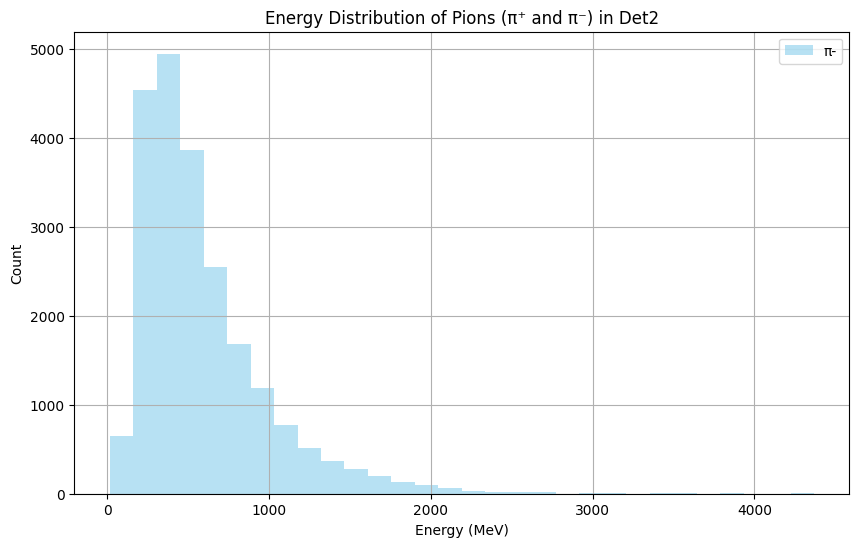

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(pi_m_2_e, bins=30, alpha=0.6, label='π-', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Pions (π⁺ and π⁻) in Det2')
plt.legend()
plt.grid(True)
plt.show()

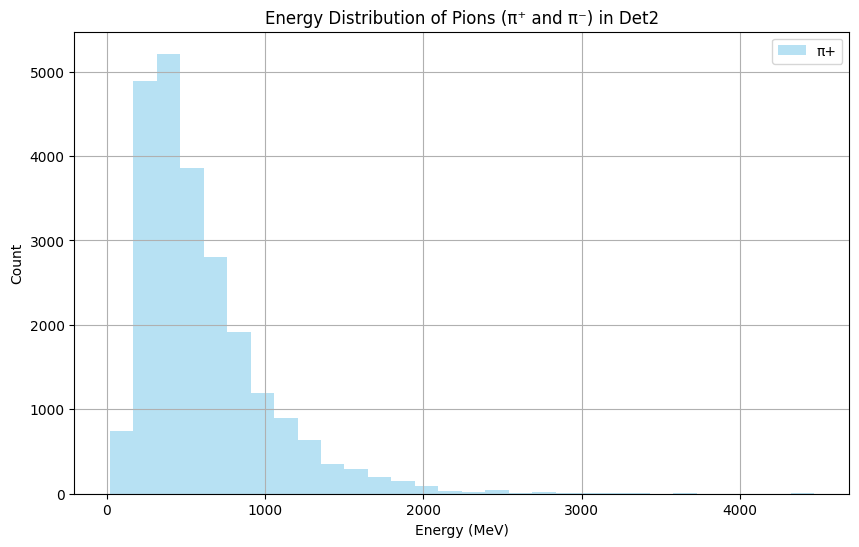

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(pi_p_2_e, bins=30, alpha=0.6, label='π+', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Pions (π⁺ and π⁻) in Det2')
plt.legend()
plt.grid(True)
plt.show()

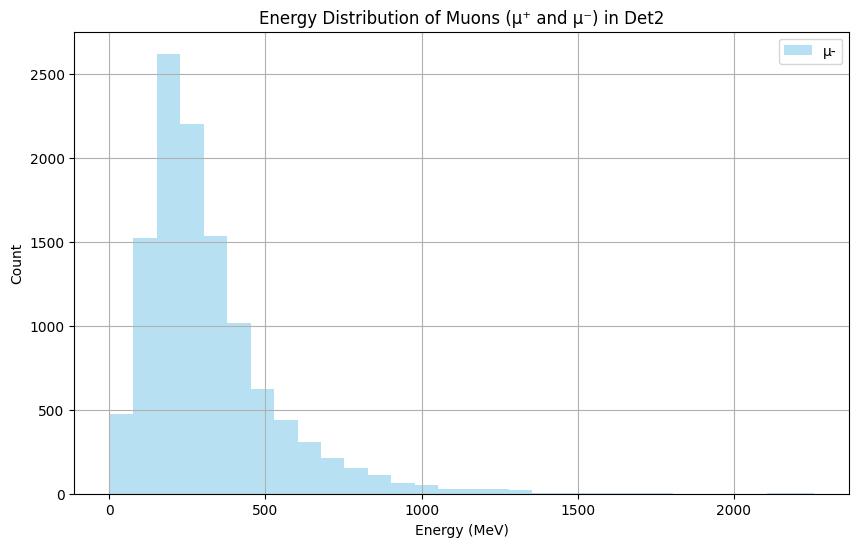

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(mu_m_2_e, bins=30, alpha=0.6, label='μ-', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (μ⁺ and μ⁻) in Det2')
plt.legend()
plt.grid(True)
plt.show()

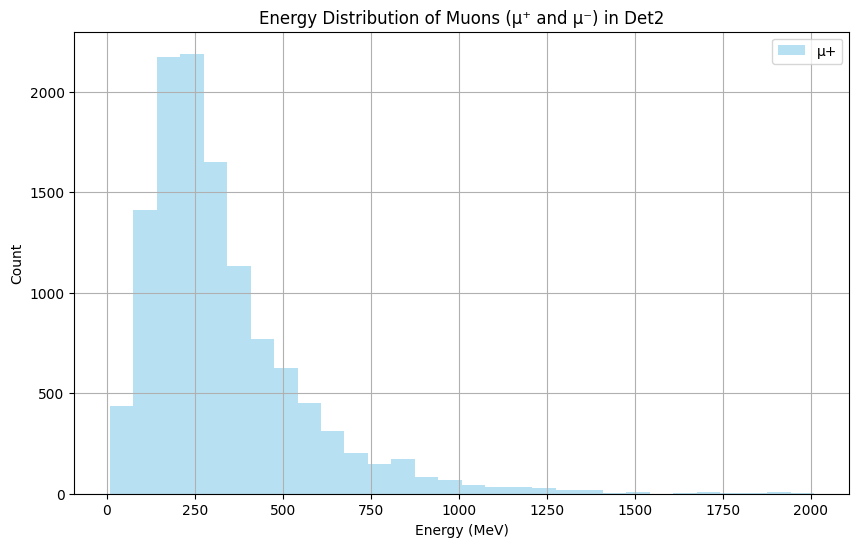

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(mu_p_2_e, bins=30, alpha=0.6, label='μ+', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (μ⁺ and μ⁻) in Det2')
plt.legend()
plt.grid(True)
plt.show()


Plot total number of muon and pions vs energy 

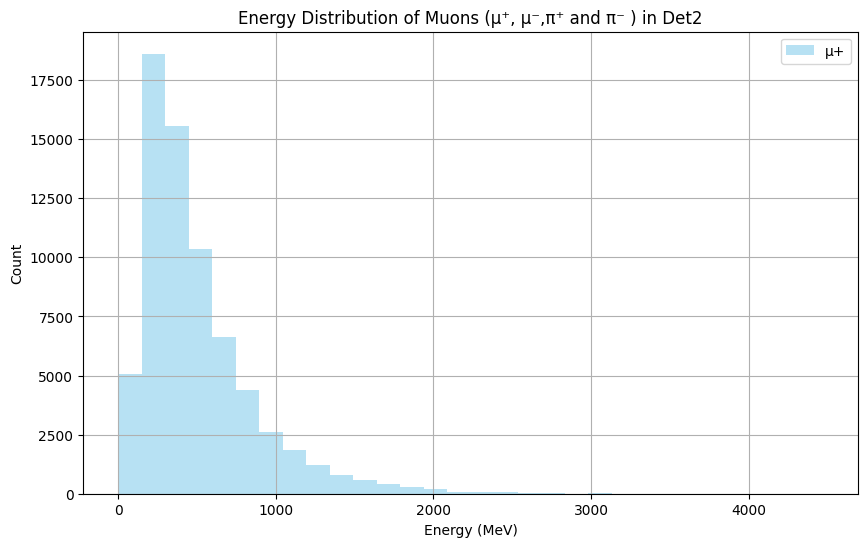

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(det2_energy, bins=30, alpha=0.6, label='μ+', color='skyblue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Energy Distribution of Muons (μ⁺, μ⁻,π⁺ and π⁻ ) in Det2')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
len(det2_energy)

68871

In [20]:
import statistics 
statistics.mean(pi_p_2_e)

599.328294779374

In [21]:
len(det1_energy)/50000

1.61088

In [22]:
len(det2_energy)/50000

1.37742